In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [4]:
data = pd.read_csv(r'/content/Titanic-Dataset.csv')
data.rename(columns={'Sex': 'Gender'}, inplace=True)

In [3]:
class EDA():
    def __init__(self, model):
        self.data = pd.read_csv(model)

    def analysis(self):
        while True:
            choice = input("What EDA now? Type 1 (shape), 2 (head), 3 (tail), 4(columns) 5(info) 6(stats) 0 (exit): ")
            if choice == "1":
                print(self.data.shape)
            elif choice == "2":
                print(self.data.head())
            elif choice == "3":
                print(self.data.tail())
            elif choice == "4":
                print(self.data.columns)
            elif choice == "5":
                print(self.data.info())
            elif choice == "6":
                print(self.data.describe(include='all'))
            elif choice == "0":
                print("Exiting EDA...")
                break
            else:
                print("Invalid choice, please select 1, 2, 3 or 0.")


    def visualization(self):
        features = list(self.data.columns)  # Access data using sel
        print("1 - Feature Distribution")
        print("2 - Feature vs Feature")
        print("3 - Correlation")
        print("4 - Outlier Detection (Boxplot)")

        choose = input("Which graph to plot: ")
        if choose == "1":
            # Plot feature distribution
            self.data.hist(figsize=(12, 8), bins=50, color='skyblue', edgecolor='black')
            plt.suptitle("Feature Distributions", fontsize=16)
            plt.show()
        elif choose == "2":
            # Plot Feature vs Feature relationship
            print("Best suggestion: Copy the feature names and then paste them to avoid errors.")
            first = input("Enter 1st Feature: \n")
            second = input("Enter 2nd Feature: \n")
            if first in features and second in features:
                plt.figure(figsize=(12, 5))
                sns.histplot(data=self.data, x=first, hue=second, multiple='stack', bins=50, palette='pastel', edgecolor='black')
                plt.title(f'{first} vs {second}')
                plt.xlabel(first)
                plt.ylabel('Count')
                plt.show()
            else:
                print("Feature not found. Exiting visualization.")
        elif choose == "3":
            # Plot correlation heatmap
            print("Please choose whether you want to see the correlation of:")
            print("1 - Entire data")
            print("2 - Just two columns")
            corr = input("Choose visualization option: ")
            if corr == "1":
                try:
                    plt.figure(figsize=(10, 8))
                    sns.heatmap(self.data.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
                    plt.title('Correlation Heatmap of All Features')
                    plt.show()
                except Exception as e:
                    print(e)
            elif corr == "2":
                print("Best suggestion: Copy the feature names and then paste them to avoid errors.")
                f1 = input("Enter 1st Feature: \n")
                f2 = input("Enter 2nd Feature: \n")
                if f1 in features and f2 in features:
                    try:
                        correl = self.data[[f1, f2]].corr()
                        sns.heatmap(correl, annot=True, cmap='coolwarm', square=True, linewidths=1, fmt=".2f")
                        plt.title(f'Correlation: {f1} vs {f2}')
                        plt.show()
                    except Exception as e:
                        print(e)
                else:
                    print("One or both features not found. Exiting correlation visualization.")
        elif choose == "4":
            # Plot boxplot for outlier detection
            plt.figure(figsize=(12, 6))
            sns.boxplot(data=self.data, palette="Set2")
            plt.xticks(rotation=45)
            plt.title("Boxplot of Features")
            plt.show()
        else:
         print("Invalid choice. Please select a valid option (1, 2, 3, or 4).")


    def clean(self):
        features = list(self.data.columns)
        while True:
            print("\nCLEANING OPTIONS:")
            print("1 - Show Missing Values")
            print("2 - Show Duplicates")
            print("3 - Drop Columns")
            print("4 - Encoding")
            print("5 - Normalize Data")
            print("6 - Scale Specific Column")
            print("7 - Save the Data")
            print("8 - Remove Outliers")
            print("0 - Exit Cleaning Menu")

            choice = input("Select option: ")

            if choice == "1":
                print(self.data.isnull().sum())
                print("Total missing values:", self.data.isnull().sum().sum())
                action = input("Do you want to handle missing values? (yes/no): ")
                if action.lower() == "yes":
                    print("\nChoose how you want to handle missing values:")
                    print("1 - Replace with a specific value")
                    print("2 - Remove rows with missing values")
                    print("3 - Forward fill or Backward fill")

                    method = input("Enter your choice (1/2/3): ")

                    if method == "1":
                        value = input("Enter the value to fill missing values: ")
                        self.data.fillna(value, inplace=True)
                        print(f"Missing values replaced with '{value}'.")

                    elif method == "2":
                        self.data.dropna(inplace=True)
                        print("Rows with missing values removed.")

                    elif method == "3":
                        print("Choose filling method:")
                        print("1 - Forward Fill")
                        print("2 - Backward Fill")
                        filling = input("Enter your choice (1/2): ")
                        if filling == "1":
                            self.data.fillna(method='ffill', inplace=True)
                            print("Missing values filled using forward fill.")
                        elif filling == "2":
                            self.data.fillna(method='bfill', inplace=True)
                            print("Missing values filled using backward fill.")
                        else:
                            print("Invalid filling choice.")

                    else:
                        print("Invalid choice.")

            elif choice == "2":
                print(self.data.duplicated().sum())
                print("Total duplicates:", self.data.duplicated().sum())
                action = input("Do you want to handle duplicates? (yes/no): ")
                if action.lower() == "yes":
                    method = input("Type 1 to remove duplicate rows or 2 to replace duplicates with value: ")
                    if method == "1":
                        self.data.drop_duplicates(inplace=True)
                        print("Duplicate rows removed.")
                    elif method == "2":
                        print("Replacing duplicates is not a common operation. Skipping replacement.")
                    else:
                        print("Invalid choice.")

            elif choice == "3":
                col = input("Enter column name to drop: ")
                if col in features:
                    self.data.drop(columns=[col], inplace=True)
                    print(f"Column '{col}' dropped.")
                else:
                    print("Column not found.")

            elif choice == "4":
                print("Currently we are only doing One Hot Encoding (OHE).")
                self.data = pd.get_dummies(self.data, drop_first=True)
                print("Encoding completed.")

            elif choice == "5":
                scaler = MinMaxScaler()
                num_cols = self.data.select_dtypes(include=['int64', 'float64']).columns
                self.data[num_cols] = scaler.fit_transform(self.data[num_cols])
                print("Normalization completed.")

            elif choice == "6":
                col = input("Enter column name to scale: ")
                if col in features:
                    if self.data[col].dtype == 'object':
                        print("Cannot scale categorical feature.")
                    else:
                        scaler = MinMaxScaler()
                        self.data[[col]] = scaler.fit_transform(self.data[[col]])
                        print(f"Scaling completed for '{col}'.")
                else:
                    print("Column not found.")

            elif choice == "7":
                name = input("Enter file name to save (without .csv): ")
                self.data.to_csv(f"{name}.csv", index=False)
                print(f"Data saved as {name}.csv")

            elif choice == "8":
                col = input("Enter column name to remove outliers: ")
                if col in features:
                    if self.data[col].dtype == 'object':
                        print("Cannot remove outliers from categorical column.")
                    else:
                        plt.figure(figsize=(8, 4))
                        sns.boxplot(x=self.data[col])
                        plt.title(f"Boxplot Before Removing Outliers: {col}")
                        plt.show()

                        Q1 = self.data[col].quantile(0.25)
                        Q3 = self.data[col].quantile(0.75)
                        IQR = Q3 - Q1
                        lower_bound = Q1 - 1.5 * IQR
                        upper_bound = Q3 + 1.5 * IQR

                        self.data = self.data[(self.data[col] >= lower_bound) & (self.data[col] <= upper_bound)]

                        plt.figure(figsize=(8, 4))
                        sns.boxplot(x=self.data[col])
                        plt.title(f"Boxplot After Removing Outliers: {col}")
                        plt.show()

                        print(f"Outliers removed from '{col}'.")
                else:
                    print("Column not found.")

            elif choice == "0":
                print("Exiting Cleaning Menu...")
                break

            else:
                print("Invalid choice, try again.")

In [5]:
print(dir(EDA))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'analysis', 'clean', 'visualization']


In [7]:
df = r'/content/Titanic-Dataset.csv'

In [8]:
model = EDA(df)

In [9]:
model.analysis()

What EDA now? Type 1 (shape), 2 (head), 3 (tail), 4(columns) 5(info) 6(stats) 0 (exit): 1
(891, 12)
What EDA now? Type 1 (shape), 2 (head), 3 (tail), 4(columns) 5(info) 6(stats) 0 (exit): 2
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 175

1 - Feature Distribution
2 - Feature vs Feature
3 - Correlation
4 - Outlier Detection (Boxplot)
Which graph to plot: 1


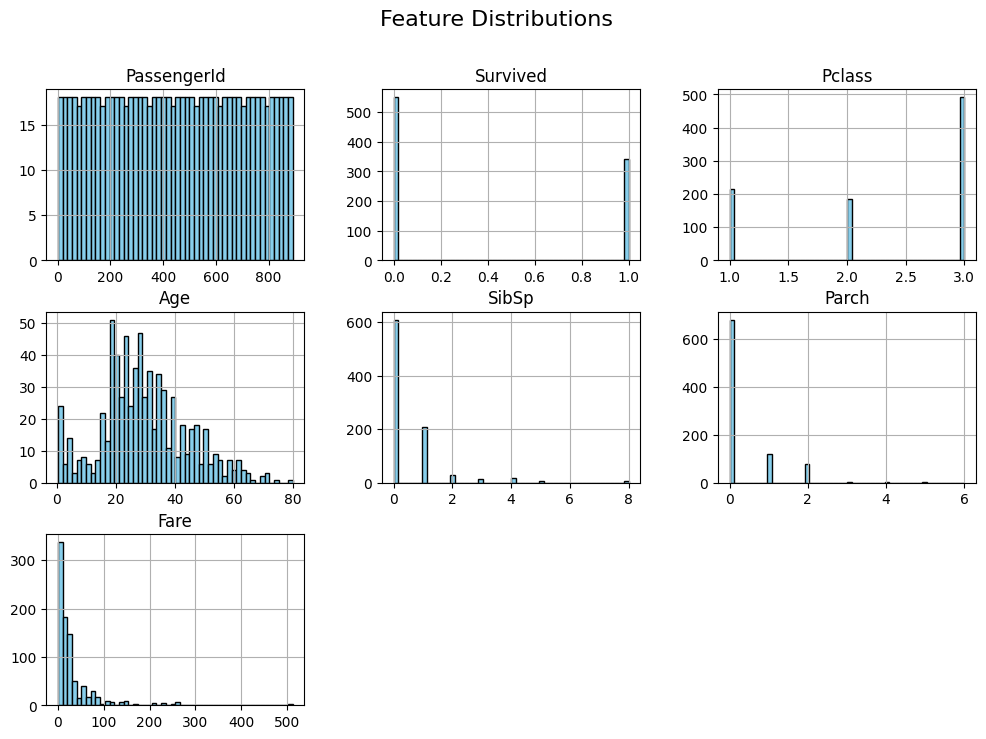

In [10]:
model.visualization()

In [11]:
model.visualization()

1 - Feature Distribution
2 - Feature vs Feature
3 - Correlation
4 - Outlier Detection (Boxplot)
Which graph to plot: 3
Please choose whether you want to see the correlation of:
1 - Entire data
2 - Just two columns
Choose visualization option: 1
could not convert string to float: 'Braund, Mr. Owen Harris'


<Figure size 1000x800 with 0 Axes>

In [13]:
model.clean()


CLEANING OPTIONS:
1 - Show Missing Values
2 - Show Duplicates
3 - Drop Columns
4 - Encoding
5 - Normalize Data
6 - Scale Specific Column
7 - Save the Data
8 - Remove Outliers
0 - Exit Cleaning Menu
Select option: 1
Survived    0
Name        0
Age         0
Parch       0
Fare        0
Embarked    0
dtype: int64
Total missing values: 0
Do you want to handle missing values? (yes/no): no

CLEANING OPTIONS:
1 - Show Missing Values
2 - Show Duplicates
3 - Drop Columns
4 - Encoding
5 - Normalize Data
6 - Scale Specific Column
7 - Save the Data
8 - Remove Outliers
0 - Exit Cleaning Menu
Select option: 3
Enter column name to drop: Name
Column 'Name' dropped.

CLEANING OPTIONS:
1 - Show Missing Values
2 - Show Duplicates
3 - Drop Columns
4 - Encoding
5 - Normalize Data
6 - Scale Specific Column
7 - Save the Data
8 - Remove Outliers
0 - Exit Cleaning Menu
Select option: 0
Exiting Cleaning Menu...


In [14]:
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [15]:
model.analysis()

What EDA now? Type 1 (shape), 2 (head), 3 (tail), 4(columns) 5(info) 6(stats) 0 (exit): 2
    Survived   Age  Parch     Fare Embarked
1          1  38.0      0  71.2833        C
3          1  35.0      0  53.1000        S
6          0  54.0      0  51.8625        S
10         1   4.0      1  16.7000        S
11         1  58.0      0  26.5500        S
What EDA now? Type 1 (shape), 2 (head), 3 (tail), 4(columns) 5(info) 6(stats) 0 (exit): 0
Exiting EDA...


In [16]:
model.clean()


CLEANING OPTIONS:
1 - Show Missing Values
2 - Show Duplicates
3 - Drop Columns
4 - Encoding
5 - Normalize Data
6 - Scale Specific Column
7 - Save the Data
8 - Remove Outliers
0 - Exit Cleaning Menu
Select option: 3
Enter column name to drop: Embarked
Column 'Embarked' dropped.

CLEANING OPTIONS:
1 - Show Missing Values
2 - Show Duplicates
3 - Drop Columns
4 - Encoding
5 - Normalize Data
6 - Scale Specific Column
7 - Save the Data
8 - Remove Outliers
0 - Exit Cleaning Menu
Select option: 0
Exiting Cleaning Menu...


In [17]:
model.analysis()

What EDA now? Type 1 (shape), 2 (head), 3 (tail), 4(columns) 5(info) 6(stats) 0 (exit): 2
    Survived   Age  Parch     Fare
1          1  38.0      0  71.2833
3          1  35.0      0  53.1000
6          0  54.0      0  51.8625
10         1   4.0      1  16.7000
11         1  58.0      0  26.5500
What EDA now? Type 1 (shape), 2 (head), 3 (tail), 4(columns) 5(info) 6(stats) 0 (exit): 0
Exiting EDA...


In [18]:
model.clean()


CLEANING OPTIONS:
1 - Show Missing Values
2 - Show Duplicates
3 - Drop Columns
4 - Encoding
5 - Normalize Data
6 - Scale Specific Column
7 - Save the Data
8 - Remove Outliers
0 - Exit Cleaning Menu
Select option: 7
Enter file name to save (without .csv): cleaned_titanic
Data saved as cleaned_titanic.csv

CLEANING OPTIONS:
1 - Show Missing Values
2 - Show Duplicates
3 - Drop Columns
4 - Encoding
5 - Normalize Data
6 - Scale Specific Column
7 - Save the Data
8 - Remove Outliers
0 - Exit Cleaning Menu
Select option: 0
Exiting Cleaning Menu...
